Name: SIMRAN ANAND
Registration number: 19BCD7243
Lab experiment: 4
Submitted on: 29-10-2021
Deep Learning CSE4006


# Project 1: Facial Emotion Recognition

# Question1: Do the Face Emotion Detection with Deep Learning

In [1]:
!git clone https://github.com/dA505819/Facial_Expression_Recognition_with_keras.git 

fatal: destination path 'Facial_Expression_Recognition_with_keras' already exists and is not an empty directory.


In [2]:
%cd Facial_Expression_Recognition_with_keras/
%mkdir -p train/{angry,disgust,fear,happy,neutral,sad,surprise}

C:\Users\simmu\Facial_Expression_Recognition_with_keras


The syntax of the command is incorrect.


In [3]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# defining dir variables 
train_dir = 'train/'
test_dir = 'test/'

In [4]:
target_var = os.listdir(train_dir)
target_var

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

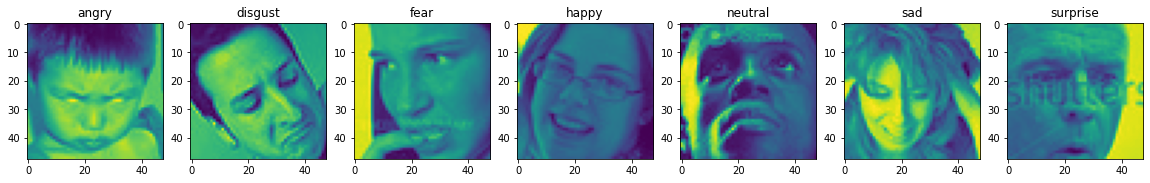

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20098 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.5),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=15)

Epoch 1/15
315/315 [==============================] - 152s 476ms/step - loss: 5.9084 - accuracy: 0.1779 - val_loss: 33841.1016 - val_accuracy: 0.1725
Epoch 2/15
315/315 [==============================] - 144s 458ms/step - loss: 5.5523 - accuracy: 0.1755 - val_loss: 7913.6494 - val_accuracy: 0.2196
Epoch 3/15
315/315 [==============================] - 144s 456ms/step - loss: 3.1200 - accuracy: 0.1857 - val_loss: 5.4217 - val_accuracy: 0.1427
Epoch 4/15
315/315 [==============================] - 143s 453ms/step - loss: 8.2595 - accuracy: 0.1758 - val_loss: 2.3604 - val_accuracy: 0.1102
Epoch 5/15
315/315 [==============================] - 146s 465ms/step - loss: 2.6016 - accuracy: 0.1873 - val_loss: 1.9958 - val_accuracy: 0.2513
Epoch 6/15
315/315 [==============================] - 143s 453ms/step - loss: 3.4893 - accuracy: 0.1794 - val_loss: 2.7311 - val_accuracy: 0.1508
Epoch 7/15
315/315 [==============================] - 107s 340ms/step - loss: 3.1714 - accuracy: 0.1834 - val_loss: 1

In [9]:
y_pred = model.predict(test)
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))
y_actual = test.classes[test.index_array]
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.1034    0.0031    0.0061       958
           1     0.0000    0.0000    0.0000       111
           2     0.1425    0.9775    0.2488      1024
           3     0.0000    0.0000    0.0000      1774
           4     0.4000    0.0016    0.0032      1233
           5     0.3553    0.0217    0.0408      1247
           6     0.1333    0.0048    0.0093       831

    accuracy                         0.1445      7178
   macro avg     0.1621    0.1441    0.0440      7178
weighted avg     0.1800    0.1445    0.0450      7178



In [10]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [11]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

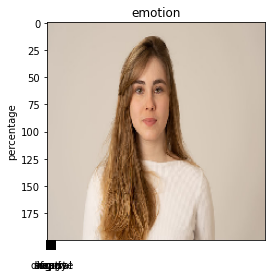

Expression Prediction: fear


In [15]:
from skimage import io
img = tf.keras.preprocessing.image.load_img('C:/Users/simmu/Dropbox/PC/Downloads/faceSample.jpg', grayscale=True, target_size=(48, 48))
show_img=tf.keras.preprocessing.image.load_img('C:/Users/simmu/Dropbox/PC/Downloads/faceSample.jpg', grayscale=False, target_size=(200, 200))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

# Project 2: Road Lane Detection

Using Deep Learning Algorithms


# Ref: https://github.com/amusi/awesome-lane-detection#2021

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [18]:
!git clone https://github.com/udacity/CarND-LaneLines-P1.git

Cloning into 'CarND-LaneLines-P1'...
